In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
show_no_show = pd.read_csv('data/show_no_show.csv')

In [43]:
show_no_show.head()

,Unnamed: 0,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,None,0,0,No
1,1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,None,0,0,No
2,2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,None,0,0,No
3,3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,None,0,0,No
4,4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,None,0,0,No


In [44]:
show_no_show.shape

(110527, 15)

In [45]:
show_no_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
Unnamed: 0        110527 non-null int64
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110182 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null object
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(6)
memory usage: 12.6+ MB


In [46]:
show_no_show['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [47]:
show_cases = show_no_show[show_no_show['No-show'] == 'Yes']['No-show'].count()
total_cases = show_no_show['No-show'].count()

no_show_rate = show_cases/total_cases
show_rate = (total_cases-show_cases)/total_cases

print(f'Percentage of patients that do not show up for their medical appointment: {round(no_show_rate*100,2)}%')
print(f'Percentage of patients that show up for their medical appointment: {round(show_rate*100,2)}%')

Percentage of patients that do not show up for their medical appointment: 20.19%
Percentage of patients that show up for their medical appointment: 79.81%


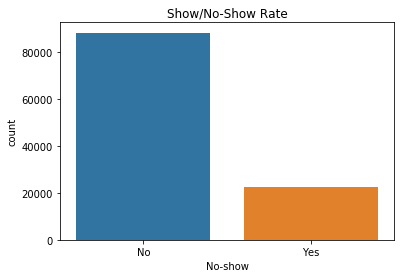

In [52]:
ax = sns.countplot(x= show_no_show['No-show'], data=show_no_show)
ax.set_title("Show/No-Show Rate")
plt.show()